# LGMVIP TASK-4
# LEVEL-INTERMEDIATE
# EXPLORATORY DATA ANALYSIS ON DATASET TERRORISM
# OBJECTIVE - AS A SECURITY/DEFENCE ANALYST TRY TO FIND OUT THE HOT ZONE OF TERRORISM
# AUTHOR - JANAPATI VINAY KUMAR YADAV

In [3]:
##IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading and Fetching the First 5 rows of the dataset
df=pd.read_csv(r"file:///C:/Users/admin/Downloads/globalterrorismdb_0718dist.csv", dtype='unicode', encoding='latin1')
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.97E+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.97E+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.97001E+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.97001E+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.97001E+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
#Finding the Overall Shape of the Database
df.shape

(181691, 135)

In [6]:
df.columns.values


array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [7]:
#Basic Infrormation about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: object(135)
memory usage: 93.6+ MB


In [8]:
#Finding Statistical values From The dataset
df.describe()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,181691,181691,181691,181691,9239,181691,2220,181691,181691,181691,...,28289,115500,76933,43516,181691,181691,181691,181691,181691,25038
unique,576,47,13,32,2244,2,1859,205,205,12,...,15429,83988,62263,36090,26,3,3,3,3,14306
top,2.01407E+11,2014,5,15,"September 18-24, 2016",0,8/4/1998,95,Iraq,10,...,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,-9,-9,0,-9,"201612010023, 201612010024, 201612010025, 2016..."
freq,1726,16903,16875,6500,101,173452,18,24636,24636,50474,...,1607,205,134,139,78002,92527,92659,160467,83830,80


In [9]:
#Checking for Null Values
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [10]:
#Filling Null values
df['approxdate']=df['approxdate'].fillna(0)
df['related']=df['related'].fillna(0)

# TOP 5 TARGETS OF TERRORIST ATTACKS


In [11]:
##TOP 5 TARGETS OF TERRORIST ATTACKS
print(df['targtype1_txt'].value_counts().head(5))

Private Citizens & Property    43511
Military                       27984
Police                         24506
Government (General)           21283
Business                       20669
Name: targtype1_txt, dtype: int64


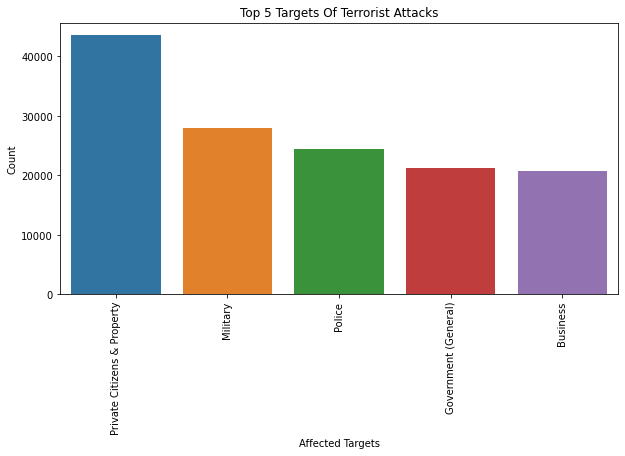

In [12]:
##PLOTTING THE SAME IN A BAR GRAPH
plt.figure(figsize = (10,5))
sns.barplot(df['targtype1_txt'].value_counts()[:5].index,df['targtype1_txt'].value_counts()[:5].values)
plt.xlabel('Affected Targets')
plt.ylabel('Count')
plt.title('Top 5 Targets Of Terrorist Attacks')
plt.xticks(rotation=90)
plt.show()

# TOP TARGET OF TERROR ATTACKS- PRIVATE CITIZEN & PROPERTY
# TOP 5 TERRORIST GROUPS

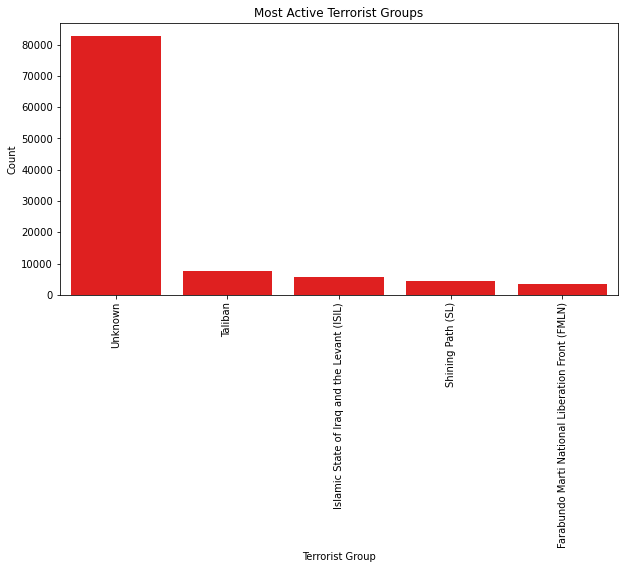

In [13]:
plt.figure(figsize = (10,5))
sns.barplot(df['gname'].value_counts(dropna=False)[:5].index,df['gname'].value_counts()[:5].values, color='Red')
plt.xlabel('Terrorist Group')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Most Active Terrorist Groups')
plt.show()

# MOST ACTIVE TERRORIST GROUP-TALIBAN
# TOP 10 COUNTRIES WITH MOST TERROR ATTACKS


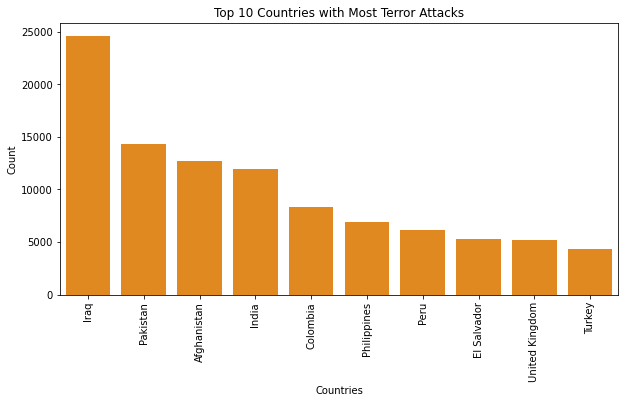

In [14]:
plt.figure(figsize = (10,5))
sns.barplot(df['country_txt'].value_counts()[:10].index,df['country_txt'].value_counts()[:10].values, color='DarkOrange')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Top 10 Countries with Most Terror Attacks')
plt.xticks(rotation=90)
plt.show()

# MOST AFFECTED COUNTRY-IRAQ
# TOP 10 STATES WITH MOST TERROR ATTACKS


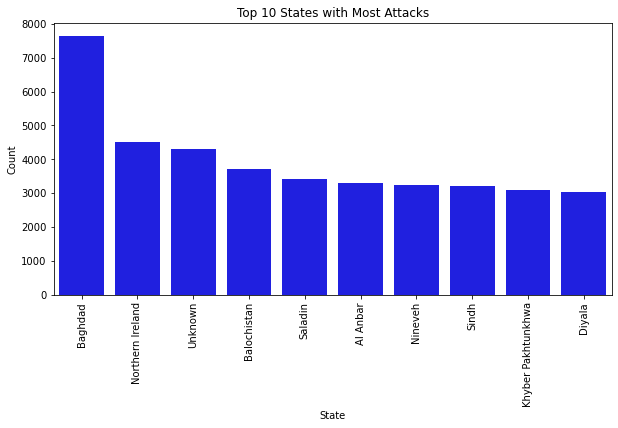

In [15]:
plt.figure(figsize = (10,5))
sns.barplot(df['provstate'].value_counts()[:10].index,df['provstate'].value_counts()[:10].values, color='Blue')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 States with Most Attacks')
plt.xticks(rotation=90)
plt.show()

# MOST AFFECTED STATE- BAGHDAD
# TOP 10 CITIES WITH MOST TERROR ATTACKS


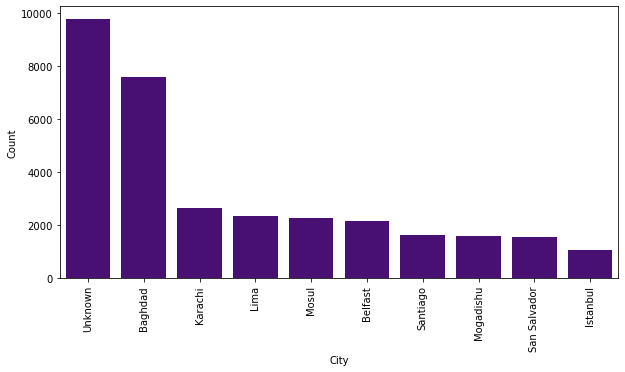

In [16]:
plt.figure(figsize = (10,5))
sns.barplot(df['city'].value_counts()[:10].index,df['city'].value_counts()[:10].values, color='Indigo')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


# MOST AFFECTED CITY- BAGHDAD
# TOP 5 REGIONS WITH MOST TERROR ATTACKS


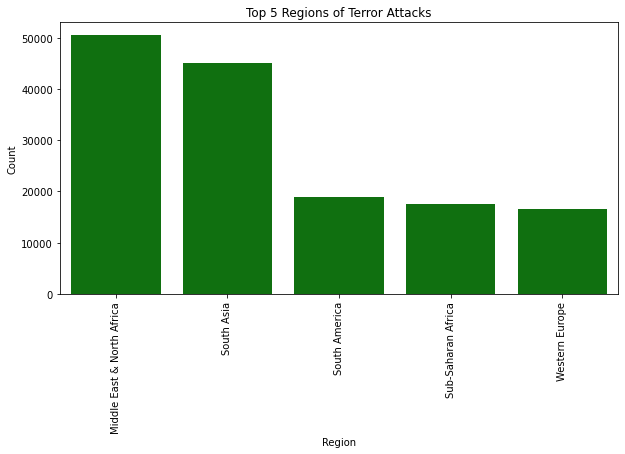

In [17]:
plt.figure(figsize = (10,5))
sns.barplot(df['region_txt'].value_counts()[:5].index,df['region_txt'].value_counts()[:5].values, color='Green')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Top 5 Regions of Terror Attacks')
plt.xticks(rotation=90)
plt.show()

# MOST AFFECTED REGION- MIDDLE EAST & NORTH AFRICA
# YEARS WITH MOST TERROR ATTACKS IN ASCENDING YEAR


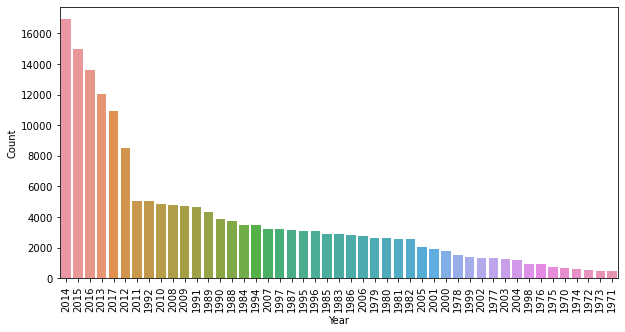

In [18]:
plt.figure(figsize = (10,5))
sns.barplot(df['iyear'].value_counts().index,df['iyear'].value_counts().values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# MOST TERRIFIC YEAR- 2014
# MONTHS WITH MOST TERROR ATTACKS IN ASCENDING YEAR


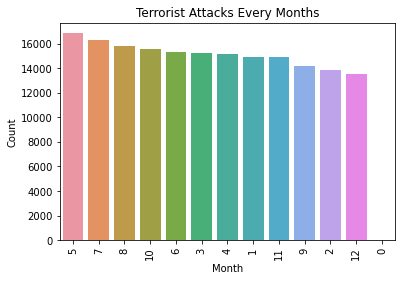

In [19]:
## YEARS WITH MOST TERROR ATTACKS IN ASCENDING YEARplt.figure(figsize = (10,5))
sns.barplot(df['imonth'].value_counts().index,df['imonth'].value_counts().values)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Terrorist Attacks Every Months')
plt.xticks(rotation=90)
plt.show()

# MONTHS WITH MOST ATTACKS- MAY
# CONCLUSION
### TOP TARGET OF TERROR ATTACKS- PRIVATE CITIZEN & PROPERTYTOP AFFECTED TARGETS- PRIVATE CITIZEN & PROPERTY, MILITARY, PLOCE, GOVERNMENT PROPERTIES & BUSINESS
### MOST ACTIVE TERRORIST GROUP-TALIBAN
### MOST AFFECTED COUNTRY-IRAQ
### MOST AFFECTED STATE- BAGHDAD
### MOST AFFECTED CITY- BAGHDAD
### MOST AFFECTED REGION- MIDDLE EAST & NORTH AFRICA
### MOST TERRIFIC YEAR- 2014
### LEAST AFFECTED YEAR- 1971
### MONTHS WITH MOST ATTACKS- MAY
# THANK YOU